In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import dask.dataframe as dd
import dask
import statistics

from dask import compute


import dask.array as da


/home/cwshpmu2282/anaconda3/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [23]:
%autosave 60

Autosaving every 60 seconds


In [2]:
plt.rcParams["figure.figsize"] = (8, 8)
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)
sns.set_style("darkgrid")
os.chdir("/home/cwshpmu2282/Desktop/EVRangePrediction/data/raw")

In [3]:
data = pd.read_csv('352891066262326_2018-12-19_cb.csv',nrows=10000)

In [4]:
#from preprocess import data_preprocessor
#from random_csv_selector import csv

In [5]:
#a = csv()
#a

In [6]:
#data = pd.read_csv(a)

In [7]:
#data = data_preprocessor(data)

In [8]:
data.head()

,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164
0,DEFREG:352891066262326,Trip not started,NaN,77.07362,28.49673,0.01,NaN,1545191523380,77.073612,28.49673,0.657325,714359872,5,30.0,2.6,4,352891066262326,Trip not started,P,M1_POCEV.0,NaN,1,545,0.0,85,10,0,1,1,0.0,1,13.9,0,50.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.0,0.0,4.055,4.055,92.4,92.4,92.3,92.3,100,16.5,16.5,16.5,14.0,14.0,14.0,15.75,15850.0,-318.0,268.25,189.0,158.0,1840,1830,100,100.0,12,205,134,11,204,-48,62,155,123,11,208,-38,512.0,-0.1,0,-0.2,-0.2,268,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,11,13,0,22,13.9,0,0.0,0.425,0.2,0,-65532,0,4227,14.0,1,3.7,4.0,65,1,0,3560,3560,3560,136,-71,616,768,-80,NaN
1,DEFREG:352891066262326,Trip not started,NaN,77.07362,28.49673,0.01,NaN,1545191523480,77.073612,28.49673,0.657325,714359872,5,30.0,2.6,4,352891066262326,Trip not started,P,M1_POCEV.0,NaN,1,545,0.0,85,10,0,1,1,0.0,1,13.9,0,50.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.0,0.0,4.055,4.055,92.4,92.4,92.3,92.3,100,16.5,16.5,16.5,14.0,14.0,14.0,15.75,15850.0,-318.0,268.25,189.0,158.0,1840,1830,100,100.0,12,205,134,11,204,-48,62,155,123,11,208,-38,512.0,-0.1,0,-0.2,-0.2,268,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,11,13,0,22,13.9,0,0.0,0.425,0.2,0,-65532,0,4227,14.0,1,3.7,4.0,65,1,0,3560,3560,3560,136,-71,616,768,-80,NaN
2,DEFREG:352891066262326,Trip not started,NaN,77.07362,28.49673,0.01,NaN,1545191523580,77.073612,28.49673,0.657325,714359872,5,30.0,2.6,4,352891066262326,Trip not started,P,M1_POCEV.0,NaN,1,545,0.0,85,10,0,1,1,0.0,1,13.9,0,50.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.0,0.0,4.055,4.055,92.4,92.4,92.3,92.3,100,16.5,16.5,16.5,14.0,14.0,14.0,15.75,15850.0,-318.0,268.25,189.0,158.0,1840,1830,100,100.0,12,205,134,11,204,-48,62,155,123,11,208,-38,512.0,-0.1,0,-0.2,-0.2,268,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,11,13,0,22,13.9,0,0.0,0.425,0.2,0,-65532,0,4227,14.0,1,3.7,4.0,65,1,0,3560,3560,3560,136,-71,616,768,-80,NaN
3,DEFREG:352891066262326,Trip not started,NaN,77.07362,28.49673,0.01,NaN,1545191523680,77.073612,28.49673,0.657325,714359872,5,30.0,2.6,4,352891066262326,Trip not started,P,M1_POCEV.0,NaN,1,545,0.0,85,10,0,1,1,0.0,1,13.9,0,50.0,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.0,0.0,4.055,4.055,92.4,92.4,92.3,92.3,100,16.5,16.5,16.5,14.0,14.0,14.0,15.75,15850.0,-318.0,268.25,189.0,158.0,1840,1830,100,

In [9]:
data.shape

(10000, 165)

In [10]:
data = data.iloc[:,20:]

In [11]:
data

,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164
0,NaN,1,545,0.0000,85,10,0,1,1,0.0,1,13.9,0,50.0,0,0,0,0.0000,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.0,0.00,4.055,4.055,92.4,92.4,92.3,92.3,100,16.5,16.5,16.5,14.0,14.0,14.0,15.75,15850.00,-318.00,268.25,189.00,158.00,1840,1830,100,100.0,12,205,134,11,204,-48,62,155,123,11,208,-38,512.00,-0.1,0,-0.2,-0.2,268,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,11,13,0,22,13.9,0,0.0000,0.425,0.2,0,-65532,0,4227,14.0,1,3.7,4.0,65,1,0,3560,3560,3560,136,-71,616,768,-80,NaN
1,NaN,1,545,0.0000,85,10,0,1,1,0.0,1,13.9,0,50.0,0,0,0,0.0000,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.0,0.00,4.055,4.055,92.4,92.4,92.3,92.3,100,16.5,16.5,16.5,14.0,14.0,14.0,15.75,15850.00,-318.00,268.25,189.00,158.00,1840,1830,100,100.0,12,205,134,11,204,-48,62,155,123,11,208,-38,512.00,-0.1,0,-0.2,-0.2,268,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,11,13,0,22,13.9,0,0.0000,0.425,0.2,0,-65532,0,4227,14.0,1,3.7,4.0,65,1,0,3560,3560,3560,136,-71,616,768,-80,NaN
2,NaN,1,545,0.0000,85,10,0,1,1,0.0,1,13.9,0,50.0,0,0,0,0.0000,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.0,0.00,4.055,4.055,92.4,92.4,92.3,92.3,100,16.5,16.5,16.5,14.0,14.0,14.0,15.75,15850.00,-318.00,268.25,189.00,158.00,1840,1830,100,100.0,12,205,134,11,204,-48,62,155,123,11,208,-38,512.00,-0.1,0,-0.2,-0.2,268,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,11,13,0,22,13.9,0,0.0000,0.425,0.2,0,-65532,0,4227,14.0,1,3.7,4.0,65,1,0,3560,3560,3560,136,-71,616,768,-80,NaN
3,NaN,1,545,0.0000,85,10,0,1,1,0.0,1,13.9,0,50.0,0,0,0,0.0000,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.0,0.00,4.055,4.055,92.4,92.4,92.3,92.3,100,16.5,16.5,16.5,14.0,14.0,14.0,15.75,15850.00,-318.00,268.25,189.00,158.00,1840,1830,100,100.0,12,205,134,11,204,-48,62,155,123,11,208,-38,512.00,-0.1,0,-0.2,-0.2,268,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,11,13,0,22,13.9,0,0.0000,0.425,0.2,0,-65532,0,4227,14.0,1,3.7,4.0,65,1,0,3560,3560,3560,136,-71,616,768,-80,NaN
4,NaN,1,545,0.0000,85,10,0,1,1,0.0,1,13.9,0,50.0,0,0,0,0.0000,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.7,0.0,0.00,4.055,4.055,92.4,92.4,92.3,92.3,100,16.5,16.5,16.5,14.0,14.0,14.0,15.75,15850.00,-318.00,268.25,189.00,158.00,1840,1830,100,100.0,12,205,134,11,204,-48,62,155,123,11,208,-38,512.00,-0.1,0,-0.2,-0.2,268,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [12]:
data = data.dropna(axis=1)

In [13]:
X = data.drop(columns = ["EVSMA_MAX"], axis = 1)
y = data.EVSMA_MAX.values

In [14]:
#X,y = data.drop(columns = ["EVMSA_MAX"]).values, data.EVSMA_MAX.values

In [15]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression

In [16]:
#X_new = SelectKBest(mutual_info_regression, k=20).fit_transform(X, y)

In [17]:
#X_new

In [18]:
X_new_2 = SelectKBest(mutual_info_regression, k=20).fit(X, y)

In [19]:
cols = X_new_2.get_support(indices = True)

In [20]:
a = list(cols)

In [21]:
for i in a:
    print(data.columns[i])

EVVSP
EVDRG
EVMCV_MAX
EVMCV_MIN
EVSMA_MAX
EVSMA_MIN
EVSMI_MAX
EVIGM_Min
EVCOM_Latest
EVICO_Min
EVIRT_Latest
EVIDC
EVMGT
EVCRP
EVDI1
EVACS
EVIST
EVHTP_AVG
EVHTP_Max
EVVBT



'352891066263282_2018-12-01_cb.csv' for this pa

EVVSP
EVDRG
EVTRQ
EVBBV
EVMCV_MAX
EVMCV_MIN
EVSMA_MAX
EVSMA_MIN
EVSMI_MAX
EVIGM_Min
EVICO_Latest
EVICO_Min
EVIDC
EVMGT
EVCRP
EVDI1
EVDI2
EVACS
EVODO
EVVBT

#352891066263282_2018-12-27_cb.csv - features selected by model :

EVVSP
EVTRQ
EVPWA_MIN
EVMCV_MAX
EVMCV_MIN
EVSMA_MAX
EVSMA_MIN
EVSMI_MAX
EVIRP
EVIGM_Min
EVCOM_Latest
EVICO_Min
EVIDC
EVMGT
EVCRP
EVDI1
EVACS
EVODO
EVHTR
EVVBT



for i in a:
    print(data.columns[i])
    
EVVSP
EVDRG
EVMCV_MAX
EVMCV_MIN
EVSMA_MAX
EVSMA_MIN
EVSMI_MAX
EVSMI_MIN
EVBOV_AVG
EVBOV_MAX
EVBOV_MIN
EVCOM_Latest
EVCOM_Max
EVIRT_Latest
EVMGS
EVDI1
EVDI2
EVODO
EVOAS
EVGSM

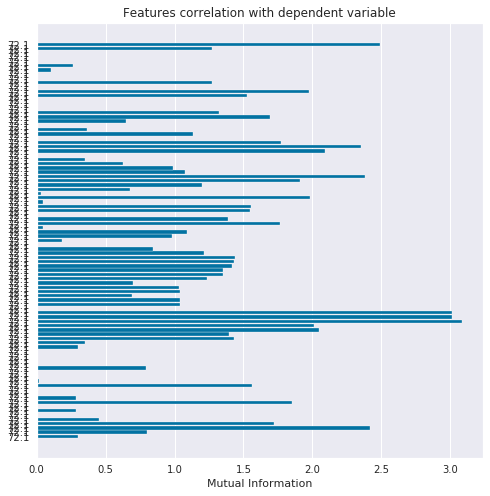

In [21]:


from yellowbrick.target import FeatureCorrelation

# Load the regression data set
#data = datasets.load_diabetes()
X = data.drop(columns = ["EVSMA_MAX"], axis = 1)
y = data.EVSMA_MAX.values
#feature_names = np.array(data['feature_names'])



visualizer = FeatureCorrelation(method='mutual_info-regression',
                                labels=data.EVSMA_MAX)
visualizer.fit(X, y, random_state=0)
for label in visualizer.ax.texts:
    label.set_size(12)
visualizer.poof()


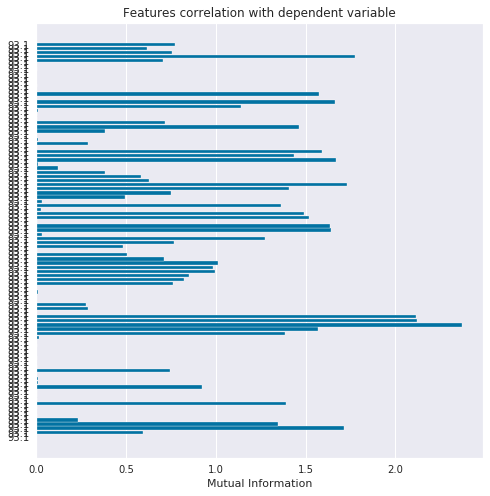

In [9]:
from yellowbrick.target import FeatureCorrelation

# Load the regression data set
#data = datasets.load_diabetes()
X = data.drop(columns = ["EVSMA_MAX"], axis = 1)
y = data.EVSMA_MAX.values
#feature_names = np.array(data['feature_names'])



visualizer = FeatureCorrelation(method='mutual_info-regression',
                                labels=data.EVSMA_MAX)
visualizer.fit(X, y, random_state=0)
for label in visualizer.ax.texts:
    label.set_size(12)
visualizer.poof()


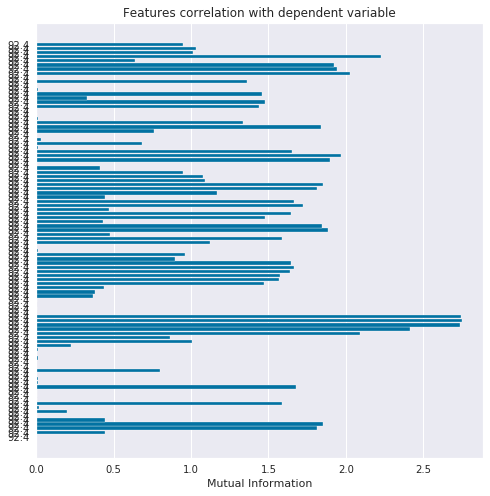

In [15]:
from yellowbrick.target import FeatureCorrelation

# Load the regression data set
#data = datasets.load_diabetes()
X = data.drop(columns = ["EVSMA_MAX"], axis = 1)
y = data.EVSMA_MAX.values
#feature_names = np.array(data['feature_names'])



visualizer = FeatureCorrelation(method='mutual_info-regression',
                                labels=data.EVSMA_MAX)
visualizer.fit(X, y, random_state=0)
for label in visualizer.ax.texts:
    label.set_size(12)
visualizer.poof()


In [22]:

from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(X,y)

importances = rnd_clf.feature_importances_

for name, importance in zip(X, rnd_clf.feature_importances_):
    print(name, "=", importance)

EVIGS = 0.0
EVIGC = 0.0
EVVSP = 0.0
EVDRG = 0.000539777521470866
EVGPO = 0.0
EVBRP = 0.0
EVCFN = 0.0
EVICR = 0.0
EVTRQ = 0.0
EVCST = 0.0
EVDDC = 0.0
EVBCA = 0.0
EVBBV = 0.009562444038071946
EVDR1 = 0.0
EVDR2 = 0.0
EVRGT = 0.0
EVACP = 0.0
EVBAP_Latest = 0.0
EVBAP_Max = 0.0
EVBAP_Min = 0.0
EVCCS = 0.0
EVHVS = 0.0
EVV12 = 0.0005737931690123066
EVPWA_MAX = 0.0031239827610101464
EVPWA_MIN = 0.22940037551462603
EVMCV_MAX = 0.026132924242812973
EVMCV_MIN = 0.0016739390994886414
EVSMA_MIN = 0.17379759881967996
EVSMI_MAX = 0.16536400500335247
EVSMI_MIN = 0.13019717639695896
EVSOH = 0.0
EVBMA_Latest = 0.0
EVBMA_Max = 0.0
EVBMA_Min = 0.0
EVBMI_Latest = 0.0001791788369355655
EVBMI_Max = 0.00015429653367345913
EVBMI_Min = 0.0
EVBOA_AVG = 0.0
EVBOA_MAX = 0.0
EVBOA_MIN = 0.0
EVBOV_AVG = 0.0
EVBOV_MAX = 0.0
EVBOV_MIN = 0.0
EVIRP = 0.0003689915753596907
EVIRN = 0.0006108303724920301
EVSOMA = 0.0
EVSOMI = 0.0
EVIGM_Latest = 0.0
EVIGM_Max = 0.0
EVIGM_Min = 0.0
EVCOM_Latest = 0.0
EVCOM_Max = 0.0
EVCOM_Min